In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# In-Depth Data Analysis 

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
not_Exited = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [7]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)
df_new = pd.concat([not_Exited , Exited],ignore_index=True)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

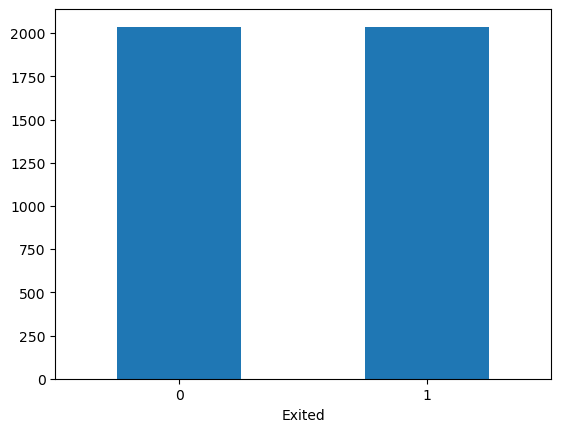

In [8]:
df_new["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

In [9]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
1,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2,744,France,Female,44,3,0.00,2,1,1,189016.14,0
3,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
4,562,France,Male,35,7,0.00,1,0,0,48869.67,0


In [10]:
df_new['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [11]:
df_new.shape

(4074, 11)

In [12]:
df=df_new
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
1,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2,744,France,Female,44,3,0.00,2,1,1,189016.14,0
3,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
4,562,France,Male,35,7,0.00,1,0,0,48869.67,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      4074 non-null   int64  
 1   Geography        4074 non-null   object 
 2   Gender           4074 non-null   object 
 3   Age              4074 non-null   int64  
 4   Tenure           4074 non-null   int64  
 5   Balance          4074 non-null   float64
 6   NumOfProducts    4074 non-null   int64  
 7   HasCrCard        4074 non-null   int64  
 8   IsActiveMember   4074 non-null   int64  
 9   EstimatedSalary  4074 non-null   float64
 10  Exited           4074 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 350.2+ KB


In [14]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
df['Gender'].value_counts()

Gender
Male      2084
Female    1990
Name: count, dtype: int64

In [17]:
df[(df['Gender']=='Male') & (df['Exited']==1)].shape

(898, 11)

## Out of 2084 male 898 has exited

In [18]:
df[(df['Gender']=='Female') & (df['Exited']==1)].shape

(1139, 11)

## Out of 1990 female 1139 has exited

<Axes: xlabel='Gender', ylabel='Exited'>

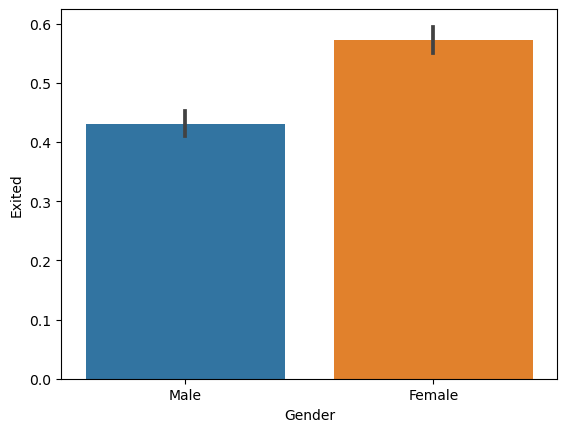

In [19]:
sns.barplot(x=df['Gender'],y=df['Exited']==1)

In [20]:
df['Geography'].value_counts()

Geography
France     1901
Germany    1245
Spain       928
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='Exited'>

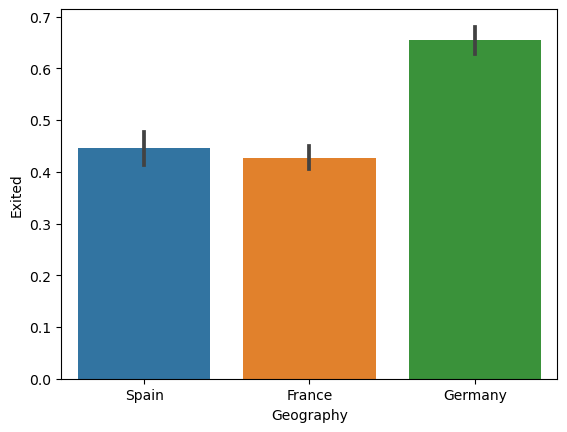

In [21]:
sns.barplot(x=df['Geography'],y=df['Exited']==1) 

In [22]:
df['Age'].describe()

count    4074.000000
mean       41.172803
std        10.659983
min        18.000000
25%        34.000000
50%        40.000000
75%        48.000000
max        92.000000
Name: Age, dtype: float64

In [23]:
exited_df = df[df['Exited'] == 1]
most_exited_age = exited_df['Age'].value_counts().idxmax()
count_most_exited_age = exited_df['Age'].value_counts().max()

print(f"The age where people exited the most: {most_exited_age} with {count_most_exited_age} exits")

females_age_46_exited = len(df[(df['Age'] == 46) & (df['Gender'] == 'Female') & (df['Exited'] == 1)])
print(f"Number of females of age 46 who exited: {females_age_46_exited}")
print(f"Number of males of age 46 who exited: {91-females_age_46_exited}")

The age where people exited the most: 46 with 91 exits
Number of females of age 46 who exited: 51
Number of males of age 46 who exited: 40


In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
1,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2,744,France,Female,44,3,0.00,2,1,1,189016.14,0
3,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
4,562,France,Male,35,7,0.00,1,0,0,48869.67,0


In [25]:
df['Tenure'].unique()

array([ 8,  9,  3,  7,  6,  4,  0, 10,  1,  2,  5], dtype=int64)

In [26]:
df['NumOfProducts'].unique()

array([2, 1, 3, 4], dtype=int64)

In [27]:
df['Balance']=df['Balance'].astype(int)
df['EstimatedSalary']=df['EstimatedSalary'].astype(int)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,606,Spain,Male,37,8,154712,2,1,0,89099,0
1,683,France,Female,33,9,0,2,1,1,38784,0
2,744,France,Female,44,3,0,2,1,1,189016,0
3,697,France,Male,27,8,141223,2,1,0,90591,0
4,562,France,Male,35,7,0,1,0,0,48869,0


In [29]:
df[(df['HasCrCard']==1) & (df['Exited']==1)].shape[0]

1424

In [30]:
df[(df['HasCrCard']==0) & (df['Exited']==1)].shape[0]

613

In [31]:
exit_counts = df.groupby(['HasCrCard', 'Exited']).size().reset_index(name='Count')
exit_pivot = exit_counts.pivot(index='HasCrCard', columns='Exited', values='Count')
print(exit_pivot)

# Check which group has exited more
if exit_pivot.loc[0, 1] > exit_pivot.loc[1, 1]:
    print("More people without a credit card have exited.")
else:
    print("More people with a credit card have exited.")

Exited        0     1
HasCrCard            
0           580   613
1          1457  1424
More people with a credit card have exited.


## People having credit card are churning more than people don't have.

In [32]:
df[(df['IsActiveMember']==1) & (df['Exited']==1)].shape[0]

735

In [33]:
df[(df['IsActiveMember']==0) & (df['Exited']==1)].shape[0]

1302

## Those who are Active Member are Churning less.

In [34]:
df[(df['IsActiveMember']==1) & (df['Gender']=='Female')].shape[0]

897

In [35]:
df[(df['IsActiveMember']==1) & (df['Gender']=='Male')].shape[0]

983

## Males are more active than Females.

<Axes: xlabel='Gender', ylabel='Exited'>

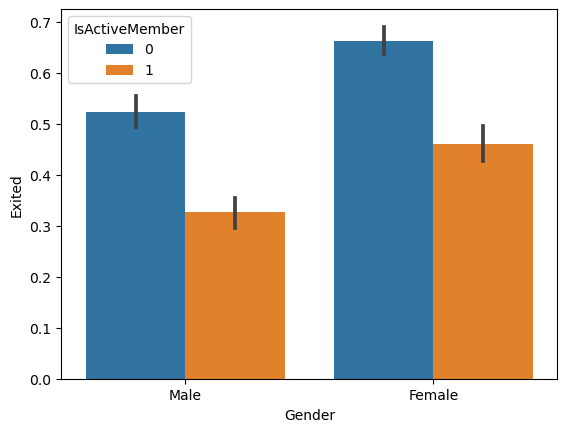

In [36]:
sns.barplot(x=df['Gender'],y=df['Exited']==1,hue=df['IsActiveMember'])

## Females are less active members and are more churners.

# ONE-HOT ENCODING

In [37]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,606,37,8,154712,2,1,0,89099,0,False,True,True
1,683,33,9,0,2,1,1,38784,0,False,False,False
2,744,44,3,0,2,1,1,189016,0,False,False,False
3,697,27,8,141223,2,1,0,90591,0,False,False,True
4,562,35,7,0,1,0,0,48869,0,False,False,True


In [38]:
df['Geography_Germany']=df['Geography_Germany'].map({True:1,False:0})
df['Geography_Spain']=df['Geography_Spain'].map({True:1,False:0})
df['Gender_Male']=df['Gender_Male'].map({True:1,False:0})

In [39]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,606,37,8,154712,2,1,0,89099,0,0,1,1
1,683,33,9,0,2,1,1,38784,0,0,0,0
2,744,44,3,0,2,1,1,189016,0,0,0,0
3,697,27,8,141223,2,1,0,90591,0,0,0,1
4,562,35,7,0,1,0,0,48869,0,0,0,1


In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [41]:
X=df.drop(columns='Exited')
y=df['Exited']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [43]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

<Axes: >

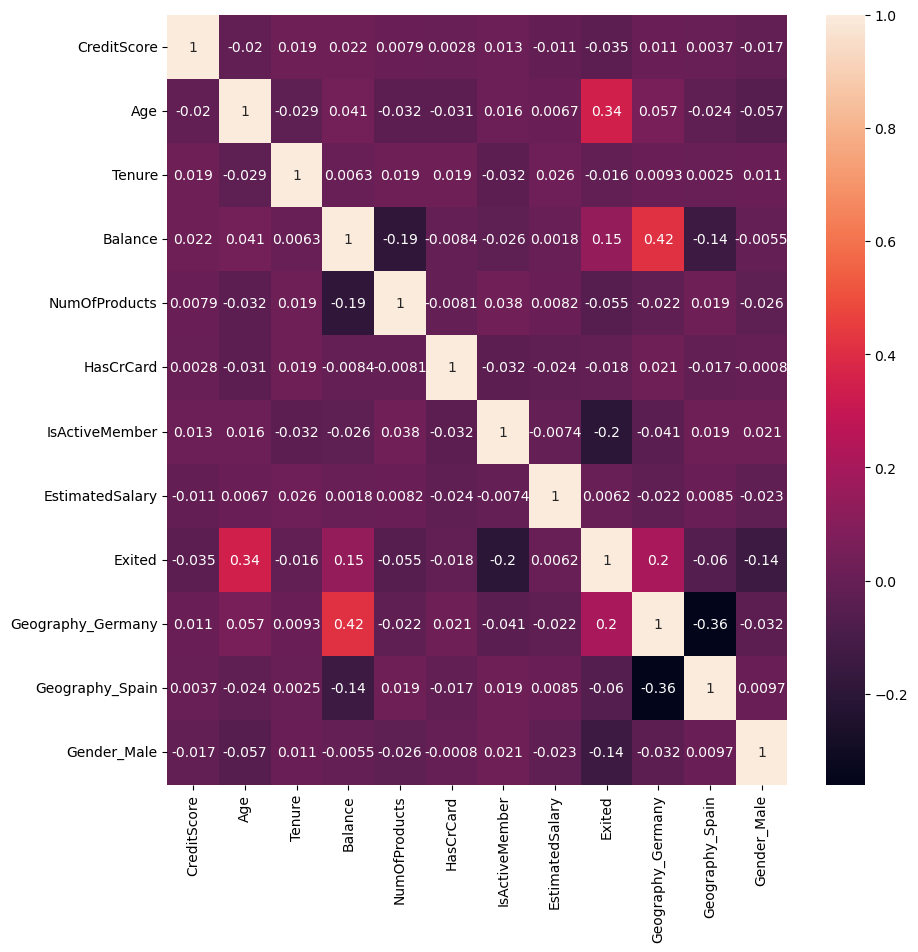

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Evaluation using ML algorithms

In [45]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Dataframe to store the results
results = pd.DataFrame(columns=['Classifier', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

# Function to evaluate and store the metrics
def evaluate_classifier(name, classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    results.loc[len(results)] = [name, precision, recall, f1, accuracy]
    
    print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_test, y_pred))

# Evaluate each classifier
for name, clf in classifiers.items():
    evaluate_classifier(name, clf)

# Display results
print("\nMetrics for all classifiers:\n", results)


Confusion Matrix for Logistic Regression:
 [[321 122]
 [107 265]]
Confusion Matrix for Decision Tree:
 [[318 125]
 [125 247]]
Confusion Matrix for Random Forest:
 [[353  90]
 [114 258]]
Confusion Matrix for Gradient Boosting:
 [[359  84]
 [ 96 276]]
Confusion Matrix for Support Vector Machine:
 [[352  91]
 [103 269]]
Confusion Matrix for K-Nearest Neighbors:
 [[345  98]
 [115 257]]
Confusion Matrix for XGBoost:
 [[355  88]
 [110 262]]

Metrics for all classifiers:
                Classifier  Precision    Recall  F1 Score  Accuracy
0     Logistic Regression   0.720219  0.719018  0.719375  0.719018
1           Decision Tree   0.693252  0.693252  0.693252  0.693252
2           Random Forest   0.749266  0.749693  0.748822  0.749693
3       Gradient Boosting   0.778812  0.779141  0.778806  0.779141
4  Support Vector Machine   0.761574  0.761963  0.761603  0.761963
5     K-Nearest Neighbors   0.738107  0.738650  0.738055  0.738650
6                 XGBoost   0.756654  0.757055  0.756297  0.7

## Evaluation using DL ANN

In [46]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback function for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 1/100
326/326 [==============================] - 3s 5ms/step - loss: 0.6173 - accuracy: 0.6582 - val_loss: 0.5755 - val_accuracy: 0.7132
Epoch 2/100
326/326 [==============================] - 1s 4ms/step - loss: 0.5468 - accuracy: 0.7196 - val_loss: 0.5416 - val_accuracy: 0.7393
Epoch 3/100
326/326 [==============================] - 1s 4ms/step - loss: 0.5161 - accuracy: 0.7445 - val_loss: 0.5312 - val_accuracy: 0.7500
Epoch 4/100
326/326 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.7606 - val_loss: 0.5090 - val_accuracy: 0.7715
Epoch 5/100
326/326 [==============================] - 1s 4ms/step - loss: 0.4757 - accuracy: 0.7633 - val_loss: 0.4873 - val_accuracy: 0.7853
Epoch 6/100
326/326 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.7745 - val_loss: 0.4878 - val_accuracy: 0.7883
Epoch 7/100
326/326 [==============================] - 1s 4ms/step - loss: 0.4579 - accuracy: 0.7787 - val_loss: 0.4781 - val_accuracy: 0.7745

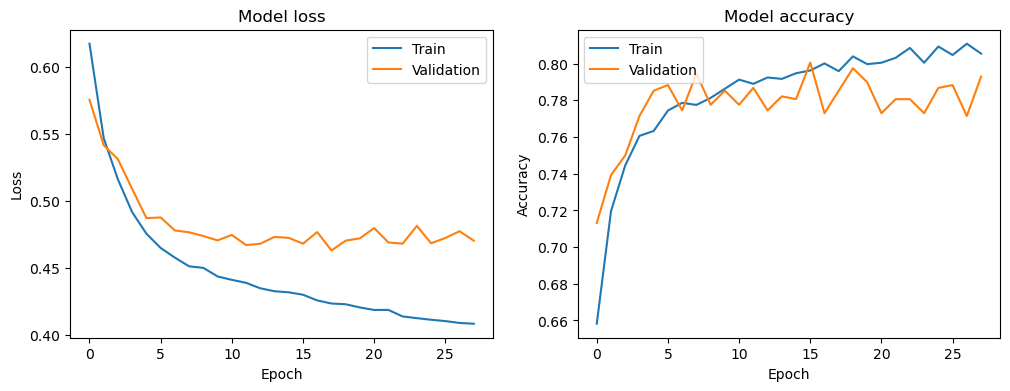

In [47]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Save The Model

In [48]:
import joblib
joblib.dump(GradientBoostingClassifier(), 'GradientBoosting_Classifier_acc=77%.pkl')

['GradientBoosting_Classifier_acc=77%.pkl']